In [153]:
import numpy as np
import matplotlib.pyplot as plt

In [417]:
input_dim = 50
num_neurons = 1
num_inputs = 25
mu = 0.01
num_epochs = 1000
bias = True

In [418]:
# Create random input vectors
init_X = np.random.uniform(size=(num_inputs, input_dim+1))

# Create random labels
init_Y = np.random.randint(size=(num_inputs,), low=0, high=10)

In [419]:
init_W = np.random.uniform(size=(input_dim+1, num_neurons))
init_W.shape


(51, 1)

In [441]:
excitatory_ratio = 0.5 
bias = True

In [442]:
if not bias:
    X = init_X[:,:-1]
    W = init_W[:-1, :]

In [443]:
error = 0
for i in range(num_inputs):
    y, _ = forward(X[i], W, excitatory_ratio, bias)
    e = Y[i] - y
    error += e**2
    if i < 5:
        print(y, Y[i])
error/num_inputs    

[1.61509517] 2
[6.6990512] 6
[0.53983098] 0
[1.78976972] 2
[7.97100787] 7


array([1.56408976])

In [444]:
def forward(x, W, excitatory_ratio, bias):
    # Mask input vector with excitatatory vs inhibitory mask    
    masked = np.copy(x)
    if 0.0 <= excitatory_ratio <= 1.0:
        inhibitory_idx = int(len(x) * excitatory_ratio)
        masked[inhibitory_idx:] *= -1   
    
    y = W.T @ masked
    return y, masked

In [445]:
errs = []
for epoch in range(num_epochs):
    for i in range(num_inputs):
        y, masked = forward(X[i], W, excitatory_ratio, bias)        
        d = Y[i]
        e = d - y
        # print(e.shape, masked.shape)
        W += mu *  (masked[:, None] @ e[None, :])
        if excitatory_ratio != -1:
            W[W < 0] = 0
        errs.append(e**2)


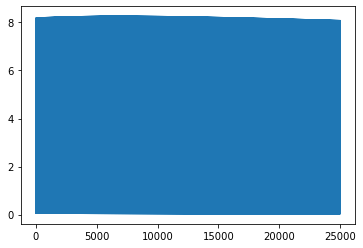

In [446]:
plt.plot(errs)

In [447]:
error = 0
for i in range(num_inputs):
    y, _ = forward(X[i], W, excitatory_ratio, bias)
    e = Y[i] - y
    error += e**2
    if i < 5:
        print(y, Y[i])
error/num_inputs    

[1.45895046] 2
[6.41036233] 6
[0.49277689] 0
[1.80012109] 2
[7.95039555] 7


array([1.45117875])

In [408]:
With trainable bias, allowing weights to move freely: 5.70397175e-05
Without trainable bias, allowing weights to move freely: 9.94222988e-06]
Without trainable bias, 50% weights fixed as excitatory: 1.56408976
With trainable bias, 50% weights fixed as excitatory: 1.45117875

SyntaxError: invalid syntax (<ipython-input-408-9ac2b57f7b35>, line 1)